In [147]:
import os
path="C:\\Users\\shs\\Desktop\\STS2011"
os.chdir(path)
os.getcwd()

'C:\\Users\\shs\\Desktop\\STS2011'

In [148]:
file='cars.csv'
from pandas import DataFrame, Series
import pandas as pd
data = pd.read_csv(file, encoding='cp949')
frame = DataFrame(data)
frame

,제조사,차종,세부트림,가격,연비
0,기아,K5,2.0 mx,2715,12.1
1,기아,K5,1.6 터보 SX,2990,12.8
2,기아,스팅어,2.0 가솔린,4030,10.4
3,기아,스팅어,3.3 가솔린,5110,8.8
4,르노삼성,SM5,2.0 가솔린,2195,11.3
5,현대,쏘나타,2.0 가솔린,2933,12.3
6,현대,쏘나타,1.6 가솔린 터보,3013,13.0
7,쉐보레,말리부,2.0 터보,3340,10.8
8,쉐보레,말리부,1.5 터보,3284,12.7
9,르노삼성,SM6,2.0 Gde,3060,12.3


In [149]:
frame.describe()

,가격,연비
count,10.000000,10.000000
mean,3267.000000,11.650000
std,798.190593,1.326022
min,2195.000000,8.800000
25%,2947.250000,10.925000
50%,3036.500000,12.200000
75%,3326.000000,12.600000
max,5110.000000,13.000000


In [150]:
frame.shape

(10, 5)

In [151]:
frame.sort_values(by='연비', ascending=False)

,제조사,차종,세부트림,가격,연비
6,현대,쏘나타,1.6 가솔린 터보,3013,13.0
1,기아,K5,1.6 터보 SX,2990,12.8
8,쉐보레,말리부,1.5 터보,3284,12.7
5,현대,쏘나타,2.0 가솔린,2933,12.3
9,르노삼성,SM6,2.0 Gde,3060,12.3
0,기아,K5,2.0 mx,2715,12.1
4,르노삼성,SM5,2.0 가솔린,2195,11.3
7,쉐보레,말리부,2.0 터보,3340,10.8
2,기아,스팅어,2.0 가솔린,4030,10.4
3,기아,스팅어,3.3 가솔린,5110,8.8


In [152]:
frame.sort_values(by='가격', ascending=False)

,제조사,차종,세부트림,가격,연비
3,기아,스팅어,3.3 가솔린,5110,8.8
2,기아,스팅어,2.0 가솔린,4030,10.4
7,쉐보레,말리부,2.0 터보,3340,10.8
8,쉐보레,말리부,1.5 터보,3284,12.7
9,르노삼성,SM6,2.0 Gde,3060,12.3
6,현대,쏘나타,1.6 가솔린 터보,3013,13.0
1,기아,K5,1.6 터보 SX,2990,12.8
5,현대,쏘나타,2.0 가솔린,2933,12.3
0,기아,K5,2.0 mx,2715,12.1
4,르노삼성,SM5,2.0 가솔린,2195,11.3


In [211]:
import matplotlib.pyplot as plt
cars = DataFrame(frame['차종'].map(str) + ' ' + frame['세부트림'])
cars.columns = ['차종']
res = pd.concat([cars, frame[['연비', '가격']]], axis=1)

,차종,연비,가격
0,K5 2.0 mx,12.1,2715
1,K5 1.6 터보 SX,12.8,2990
2,스팅어 2.0 가솔린,10.4,4030
3,스팅어 3.3 가솔린,8.8,5110
4,SM5 2.0 가솔린,11.3,2195
5,쏘나타 2.0 가솔린,12.3,2933
6,쏘나타 1.6 가솔린 터보,13.0,3013
7,말리부 2.0 터보,10.8,3340
8,말리부 1.5 터보,12.7,3284
9,SM6 2.0 Gde,12.3,3060


In [200]:
frame.columns = ['brand', 'car', 'trim', 'price', 'kmpl']
avg1 = []
avg2 = []
for car in frame['car'].unique():
    loc = data.loc[data['car'] == car]
    avg1.append(loc[['kmpl']].mean())
    avg2.append(loc[['price']].mean())
    

df1 = DataFrame(avg1)
df2 = DataFrame(avg2)
df3 = DataFrame(frame['car'].unique())

result = pd.concat([df3, df1, df2], axis=1)
result.columns = ['car', 'avg kmpl', 'avg price']

In [201]:
result

,car,avg kmpl,avg price
0,K5,12.45,2852.5
1,스팅어,9.60,4570.0
2,SM5,11.30,2195.0
3,쏘나타,12.65,2973.0
4,말리부,11.75,3312.0
5,SM6,12.30,3060.0


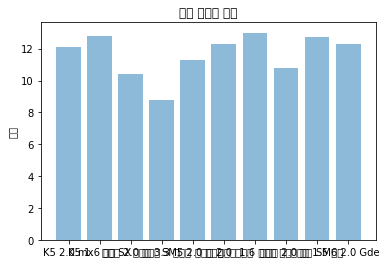

In [215]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(res['차종']))
plt.bar(y_pos, res['연비'], align='center', alpha=0.5)
plt.xticks(y_pos, res['차종'])
plt.ylabel('연비')
plt.title('차종 트림별 연비')
plt.show()

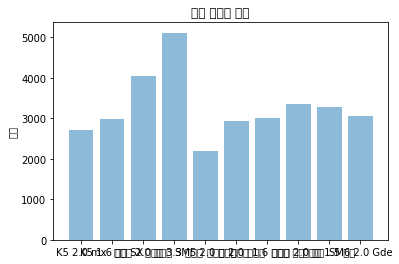

In [216]:
plt.bar(y_pos, res['가격'], align='center', alpha=0.5)
plt.xticks(y_pos, res['차종'])
plt.ylabel('가격')
plt.title('차종 트림별 가격')
plt.show()